In [1]:
import os
from pathlib import Path

import osmnx
import pandas

In [2]:
ROOT_DIR = Path(os.getcwd()).parent.parent.absolute().__str__()
ROOT_DIR

'D:\\projects\\Deep-Learning-on-Accident-Black-Spots'

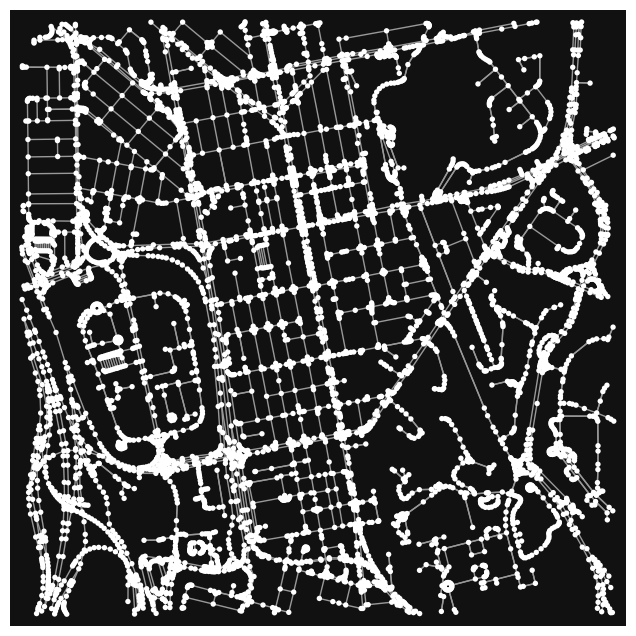

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
graph = osmnx.graph_from_address('Nathan Road', network_type='drive_service', simplify=False)
osmnx.plot_graph(graph)

In [4]:
node_info_tuple, edge_info_tuple = osmnx.graph_to_gdfs(graph)
print(len(node_info_tuple))
print(len(edge_info_tuple))

5903
7623


In [5]:
for node_info in node_info_tuple.iterrows():
    print('=' * 100)
    print(node_info)
    print('=' * 100)
    print(node_info[0])
    print('=' * 100)
    print(node_info[1]['x'])
    print(node_info[1]['y'])
    print('=' * 100)
    break

(33004486, y                                    22.309267
x                                   114.171186
street_count                                 2
ref                                        NaN
highway                                    NaN
geometry        POINT (114.1711861 22.3092667)
Name: 33004486, dtype: object)
33004486
114.1711861
22.3092667


In [6]:
for edge_info in edge_info_tuple.iterrows():
    print('=' * 100)
    print(edge_info)
    print('=' * 100)
    print(edge_info[0])
    print('=' * 100)
    print(edge_info[1]['osmid'])
    print(edge_info[1]['name'])
    print('=' * 100)
    break

((33004486, 11160065407, 0), osmid                                               102506132
oneway                                                   True
lanes                                                       3
name                                          彌敦道 Nathan Road
highway                                               primary
reversed                                                False
length                                                 10.784
junction                                                  NaN
bridge                                                    NaN
ref                                                       NaN
maxspeed                                                  NaN
tunnel                                                    NaN
access                                                    NaN
service                                                   NaN
area                                                      NaN
geometry    LINESTRING (114.1711861 22.30

In [7]:
node_series_list = []

for node_info in node_info_tuple.iterrows():
    node_info[1]['node_id'] = node_info[0]
    node_series_list.append(node_info[1])

node_dataframe = pandas.concat(node_series_list, axis=1).transpose().reset_index(drop=True)
node_dataframe

,y,x,street_count,ref,highway,geometry,node_id
0,22.309267,114.171186,2,NaN,NaN,POINT (114.1711861 22.3092667),33004486
1,22.310275,114.171095,4,NaN,NaN,POINT (114.1710946 22.310275),33004487
2,22.312977,114.170717,4,NaN,NaN,POINT (114.1707174 22.3129765),33004488
3,22.308573,114.167675,2,NaN,NaN,POINT (114.1676752 22.3085728),33476502
4,22.309046,114.17141,2,NaN,NaN,POINT (114.1714105 22.3090462),34971932
...,...,...,...,...,...,...,...
5898,22.310662,114.161972,2,NaN,NaN,POINT (114.1619718 22.3106624),11242686023
5899,22.310976,114.161445,2,NaN,NaN,POINT (114.1614446 22.3109762),11242686024
5900,22.31061,114.162097,2,NaN,NaN,POINT (114.1620967 22.3106095),11242686025
5901,22.318421,114.164305,2,NaN,NaN,POINT (114.1643053 22.3184214),11242686026


In [8]:
edge_series_list = []

for edge_info in edge_info_tuple.iterrows():
    edge_info[1]['node2node_id'] = edge_info[0]
    edge_series_list.append(edge_info[1])

edge_dataframe = pandas.concat(edge_series_list, axis=1).transpose().reset_index(drop=True)
edge_dataframe

,osmid,oneway,lanes,name,highway,reversed,length,junction,bridge,ref,maxspeed,tunnel,access,service,area,geometry,node2node_id
0,102506132,True,3,彌敦道 Nathan Road,primary,False,10.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (114.1711861 22.3092667, 114.171175...","(33004486, 11160065407, 0)"
1,102506130,True,3,彌敦道 Nathan Road,primary,False,48.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (114.1710946 22.310275, 114.1710536...","(33004487, 10813125727, 0)"
2,102506142,True,2,眾坊街 Public Square Street,secondary,False,1.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (114.1710946 22.310275, 114.1710767...","(33004487, 9125470653, 0)"
3,102640426,True,3,彌敦道 Nathan Road,primary,False,11.143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (114.1707174 22.3129765, 114.170737...","(33004488, 6357916699, 0)"
4,250489279,True,2,窩打老道 Waterloo Road,primary,False,10.668,intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (114.1707174 22.3129765, 114.170620...","(33004488, 1151084822, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,30658123,True,2,連翔道 Lin Cheung Road,primary,False,10.964,NaN,yes,NaN,80,NaN,NaN,NaN,NaN,"LINESTRING (114.1619718 22.3106624, 114.161876...","(11242686023, 11242686013, 0)"
7619,30658123,True,2,連翔道 Lin Cheung Road,primary,False,9.719,NaN,yes,NaN,80,NaN,NaN,NaN,NaN,"LINESTRING (114.1614446 22.3109762, 114.161376...","(11242686024, 11242686016, 0)"
7620,30658123,True,2,連翔道 Lin Cheung Road,primary,False,14.131,NaN,yes,NaN,80,NaN,NaN,NaN,NaN,"LINESTRING (114.1620967 22.3106095, 114.161971...","(11242686025, 11242686023, 0)"
7621,102434650,True,2,西九龍走廊西 West Kowloon Corridor West,trunk,False,38.248,NaN,viaduct,5,70,NaN,NaN,NaN,NaN,"LINESTRING (114.1643053 22.3184214, 114.163933...","(11242686026, 11242686005, 0)"


In [9]:
node_dataframe.to_csv(f'{ROOT_DIR}/data/raw/osm_node_info.csv', index=False)
edge_dataframe.to_csv(f'{ROOT_DIR}/data/raw/osm_edge_info.csv', index=False)